## Fama-French 3 Factor Model

$$(r_i - r_f) = \alpha + \beta (r_M - r_f) + \theta_s \mbox{SMB} + \theta_v \mbox{HML} +\epsilon$$

여기서 $r$은 포트폴리오의 기대 수익률, $R_f$ 는 무위험 수익률, $R_m$ 은 시장 포트폴리오의 수익률이다. $β$ 는 기존 $β$와 유사 하지만 일부 작업을 수행 할 두 개의 추가 요소가 있으므로 같지는 않다. 위 식에서 $\mbox{SMB}$ 는 " Small Minus Big"(시가총액)을 의미하고 $\mbox{HML}$ 은 " High Minus Low"(book-to-market ratio)를 의미한다

$\mbox{SMB}$ 및 $\mbox{HML}$이 정의되면 해당 계수 $\theta_s$ 및 $\theta_v$ 는 선형 회귀에 의해 결정되며 양수 값뿐만 아니라 음수 값도 사용할 수 있다

### 1. Data Import

[Fama-French Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)에서 데이터를 구할 수 있다

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# factors(market, smb, hml)
factors = pd.read_csv('F-F_Research_Data_Factors.csv',index_col=0, header=3).dropna()
factors.columns = ['market', 'SMB', 'HML', 'risk free']
factors.index = factors.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
factors

,market,SMB,HML,risk free
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2020-12-01,4.63,4.81,-1.36,0.01
2021-01-01,-0.03,7.19,2.85,0.00
2021-02-01,2.78,2.11,7.08,0.00
2021-03-01,3.08,-2.48,7.40,0.00


portfolio 자료 데이터도 가져온다

In [2]:
portfolio = pd.read_csv('6_Portfolios_2x3.csv',index_col=0, header=15).dropna()
portfolio.index = portfolio.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
portfolio.columns = ['s_bm1','s_bm2','s_bm3','b_bm1','b_bm2','b_bm3']
portfolio

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614
...,...,...,...,...,...,...
2020-12-01,12.5171,7.9464,8.5283,4.4932,4.3147,5.7637
2021-01-01,5.7175,5.2626,10.0531,-0.6429,-0.6081,0.7240
2021-02-01,5.8400,9.5690,9.3848,0.4247,6.9852,11.0400
2021-03-01,-2.7927,2.9487,7.0782,2.3297,5.0789,7.2534


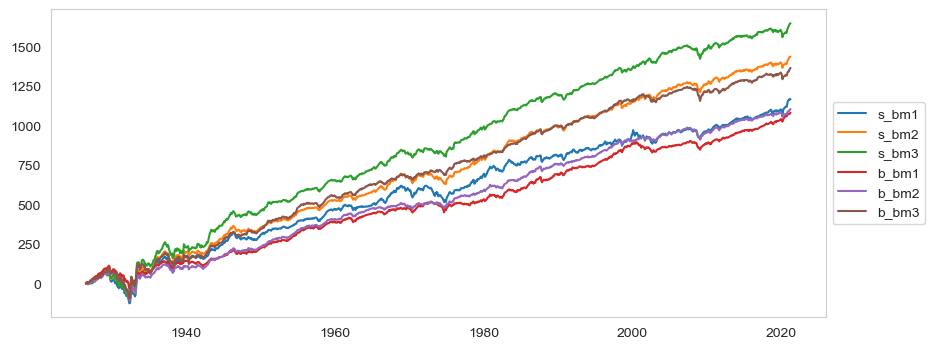

In [3]:
# performances of portfolios

plt.figure(figsize = (10,4))
for col in portfolio.columns :
    plt.plot(portfolio[col].cumsum(), label=col)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(False)
plt.show()

MultiCollinearity를 확인하기 위해 pairplot을 보면 좋다

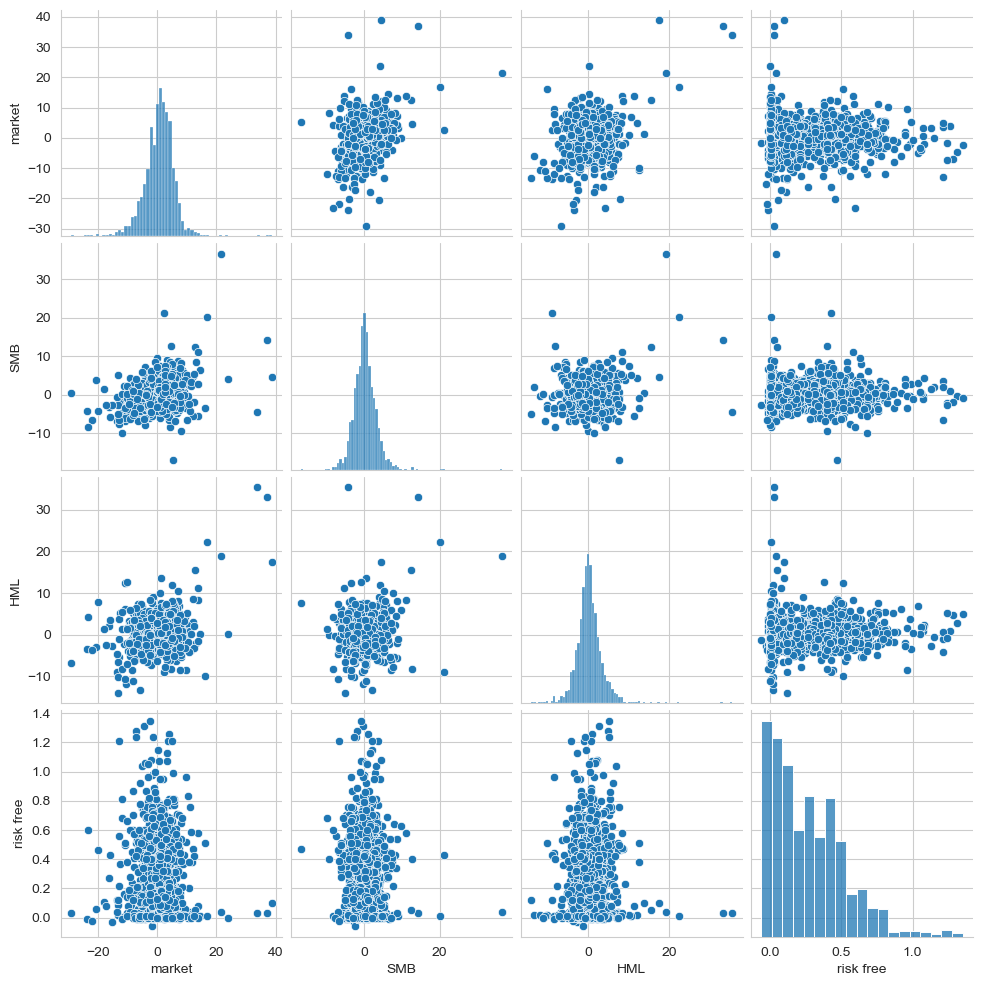

In [4]:
sns.pairplot(factors)
plt.show()

### 2. OLS Estimation

다중회귀모형을 추정하기 위해 dataframe을 합쳐 준다

In [5]:
data = pd.concat([portfolio, factors], axis=1)
data

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3,market,SMB,HML,risk free
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222,2.96,-2.30,-2.87,0.22
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154,2.64,-1.40,4.19,0.25
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967,0.36,-1.32,0.01,0.23
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970,-3.24,0.04,0.51,0.32
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614,2.53,-0.20,-0.35,0.31
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,12.5171,7.9464,8.5283,4.4932,4.3147,5.7637,4.63,4.81,-1.36,0.01
2021-01-01,5.7175,5.2626,10.0531,-0.6429,-0.6081,0.7240,-0.03,7.19,2.85,0.00
2021-02-01,5.8400,9.5690,9.3848,0.4247,6.9852,11.0400,2.78,2.11,7.08,0.00
2021-03-01,-2.7927,2.9487,7.0782,2.3297,5.0789,7.2534,3.08,-2.48,7.40,0.00


In [6]:
import statsmodels.api as sm

y = data['s_bm1'] - data['risk free']
X = data[['market', 'SMB', 'HML']]

ols = sm.OLS(y,sm.add_constant(X)).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:26:37   Log-Likelihood:                -1822.8
No. Observations:                1138   AIC:                             3654.
Df Residuals:                    1134   BIC:                             3674.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1435      0.036     -3.982      0.0

추정된 OLS 회귀모형이 잘 되었는지 확인하기 위해 잔차가 정규분포인지 확인해야 한다

<AxesSubplot:ylabel='Count'>

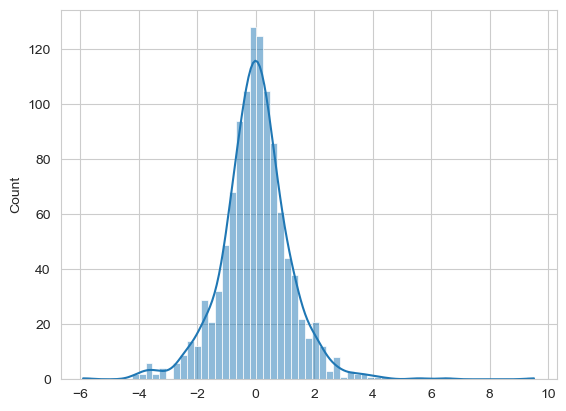

In [7]:
sns.histplot(ols.resid, kde = True)